In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
data = np.load('../data.npz')

In [35]:
list(data.keys())

['bc', 'heatmaps', 'image', 'fields']

In [36]:
fields = data['fields']

In [37]:
def get_part(idx, fields):
    
    V = fields[...,idx*2]
    U = -fields[...,idx*2+1]

    rows, cols = U.shape
    X, Y = np.meshgrid(np.arange(0, cols), np.arange(0,rows))
    norm = (U**2 + V**2)**(0.5)
    return X,Y,U,V, norm


In [45]:
# V = np.sum(fields[...,::2],axis=-1)
# U = np.sum(fields[...,1::2],axis=-1)

# allfields = np.dstack((V,U))
X,Y,U,V, norm = get_part(0, fields)
print(U.shape)

(64, 64)


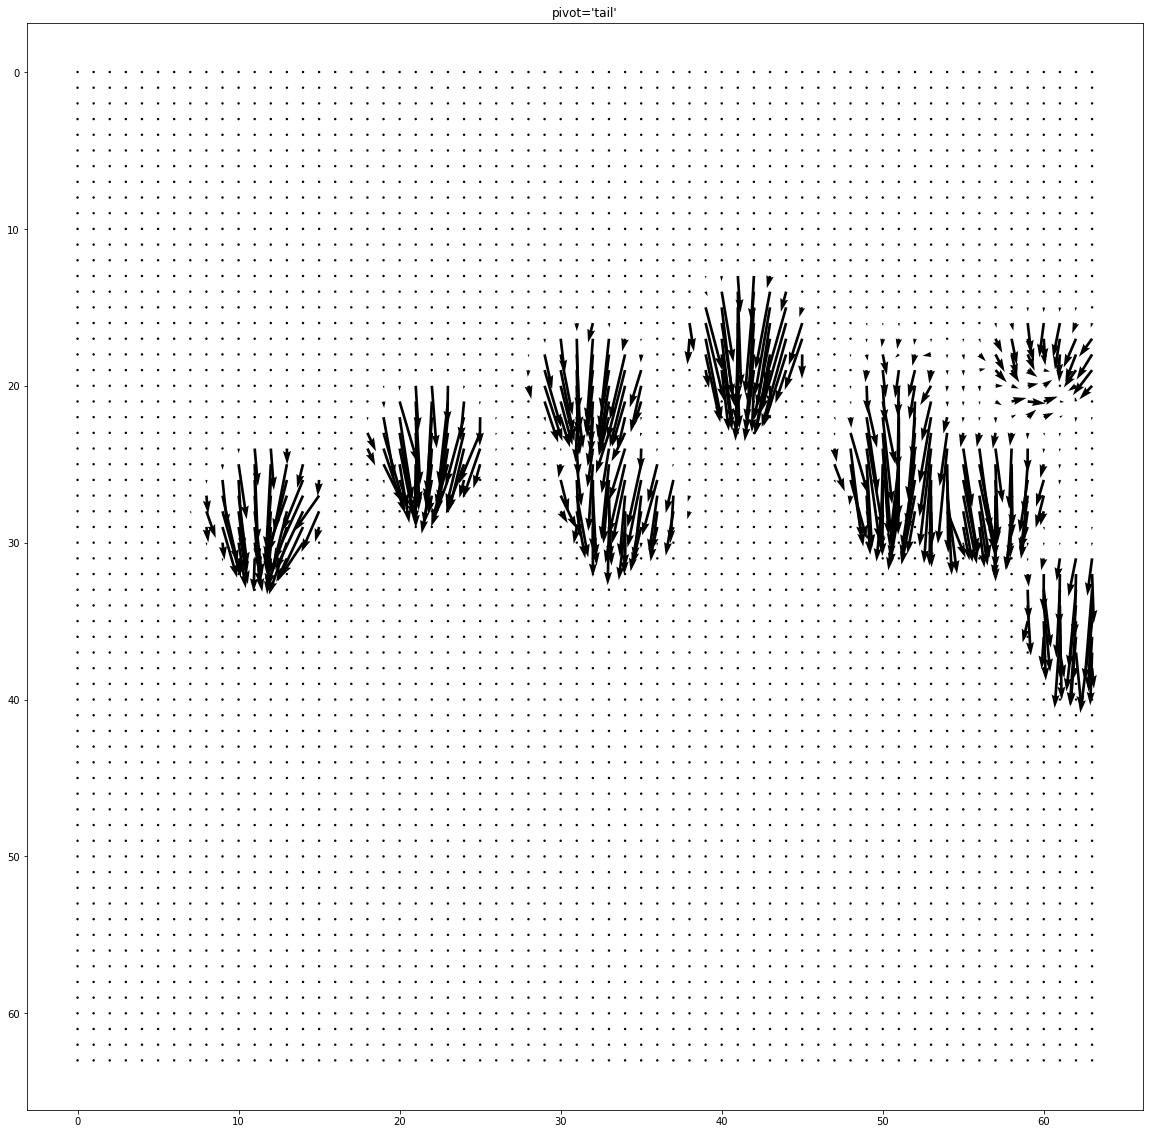

In [46]:
fig = plt.figure(figsize=(20,20))
plt.gca().invert_yaxis()
step = 1
sx = 0
ex = 64
sy = 0
ey = 64
plt.title("pivot='tail'")
Q = plt.quiver(X[sy:ey:step, sx:ex:step], Y[sy:ey:step, sx:ex:step], U[sy:ey:step, sx:ex:step], V[sy:ey:step, sx:ex:step],
               pivot='tail', units='dots', scale=0.002, scale_units='dots')

# fig.colorbar(Q,extend='max')

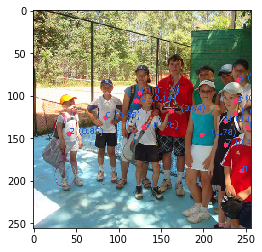

In [42]:
plt.imshow(data["image"][...,::-1])